In [14]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

def solve(N0, t0=0, t1=1, h=0.1):
    r = ode(population_func).set_integrator('dopri5').set_initial_value(N0, t0)
    N, t = [N0], [t0]
    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

## Задача №1

In [15]:
birth_coef = 36
death_coef = 15
competition = 3

In [16]:
def population_func(t, N):
    return birth_coef * (N**2 / (1 + N)) - death_coef * N - competition * N**2

def get_bounds():
    s = birth_coef - death_coef - competition
    c = (s**2 - 4 * death_coef * competition)**0.5
    a, b = (-c - s) / (-2 * competition), (c - s) / (-2 * competition)
    return (min(a, b), max(a, b))

In [17]:
L, H = get_bounds()
print('Нижня критична межа: ', L)
print('Верхня критична межа: ', H)

Нижня критична межа:  1.0
Верхня критична межа:  5.0


In [19]:
cases = [
    (.49 * L, "0.49L"),
    (.99 * L, "0.99L"),
    (L, "L"),
    (1.01*L, "1.01L"),
    (L + 0.6 * (H - L), "L + 0.6 * (H - L)"),
    (H, "H"),
    (1.2*H, "1.2H")
]

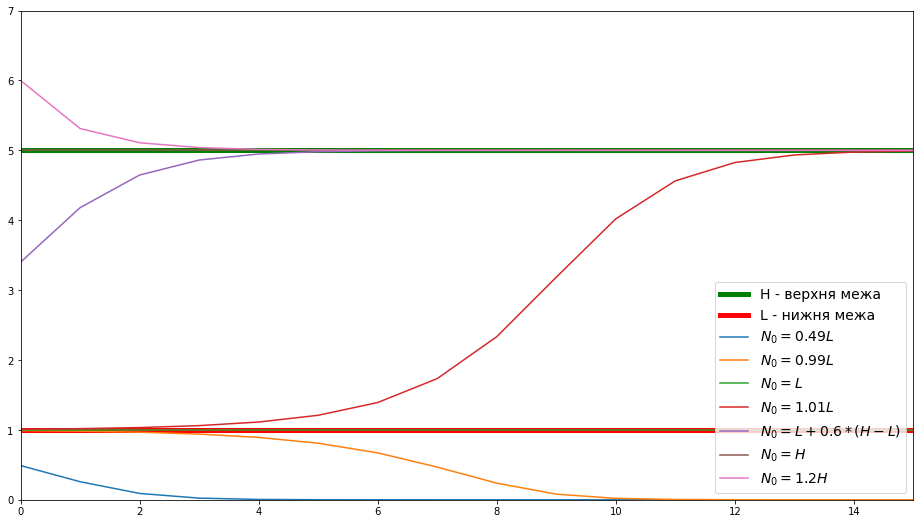

In [20]:
xl, xh = 0, 15
plt.figure(figsize=(16, 9))
plt.axis([xl, xh, 0, H + 2])
plt.axhline(y=H, color='g', linestyle='-', linewidth=5, label='H - верхня межа')
plt.axhline(y=L, color='r', linestyle='-', linewidth=5, label='L - нижня межа')
for start, label in cases:
    N, _ = solve(start, xl, xh)
    plt.plot(N, label=r'$N_{0}=' + label + '$')

plt.legend(loc='best', prop={'size': 14})
plt.show()    

## Задача №2

In [21]:
population_func = lambda t, N: 0.0004*N**2 - 0.06*N
initial_counts = [200, 150, 100]
t = 20

In [22]:
func = lambda N: 150 / (np.exp(150 + 0.06 * N) + 1)

Населення при стартовій популяції 200: 882.5046836364429
Населення при стартовій популяції 150: 150.0
Населення при стартовій популяції 100: 56.38973811231336


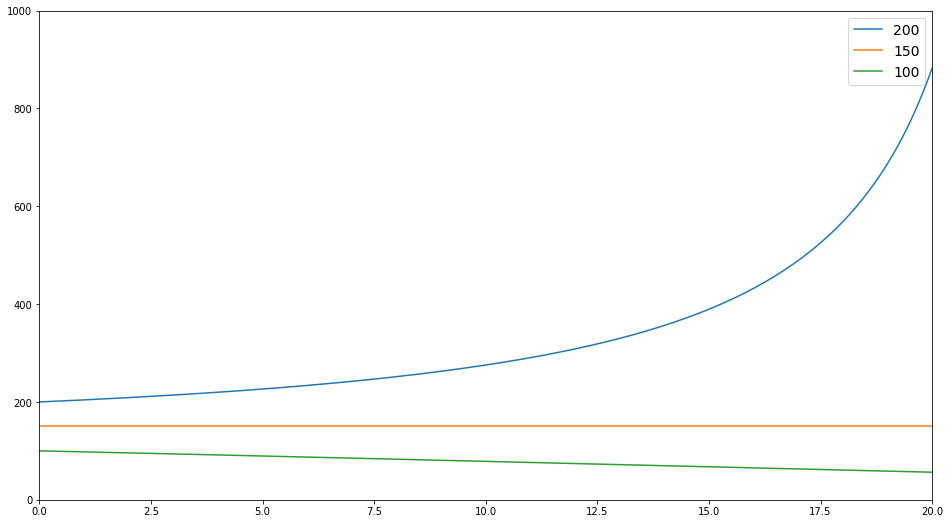

In [23]:
plt.figure(figsize=(16, 9))
plt.axis([0, 20, 0, 1000])
for count in initial_counts:
    N, t = solve(count, 0, 20)
    plt.plot(t, N, label=str(count))
    print("Населення при стартовій популяції {}: {}".format(count, N[-1][0]))
plt.legend(loc='best', prop={'size': 14})
plt.show() 